# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, eta_homeo=0.05, alpha_homeo=0.02, verbose=0)
experiments = SHL_set(opts, tag=tag)

In [3]:
%%writefile {experiments.shl.data_cache}/{tag}.py

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, eta_homeo=0.05, alpha_homeo=0.02, verbose=0)
experiments = SHL_set(opts, tag=tag)
list_figures = []
list_figures = ['show_dico']

for variable in ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']:
    experiments.scan(variable=variable, list_figures=list_figures, display='')


Writing data_cache/HAP.py


In [ ]:
!ls -l {experiments.shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 19:35 data_cache/HAP - alpha_homeo=0.002_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 19:51 data_cache/HAP - alpha_homeo=0.004308869380063767_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 20:06 data_cache/HAP - alpha_homeo=0.009283177667225558_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 20:21 data_cache/HAP - alpha_homeo=0.02_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 20:36 data_cache/HAP - alpha_homeo=0.04308869380063767_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 20:51 data_cache/HAP - alpha_homeo=0.09283177667225555_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 21:06 data_cache/HAP - alpha_homeo=0.2_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 15:13 data_cache/HAP - eta=0.00030000000000000003_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1608213 Feb 12 15:28 data_cache/HAP - eta=0.000646330407009565_dico.pkl
-r

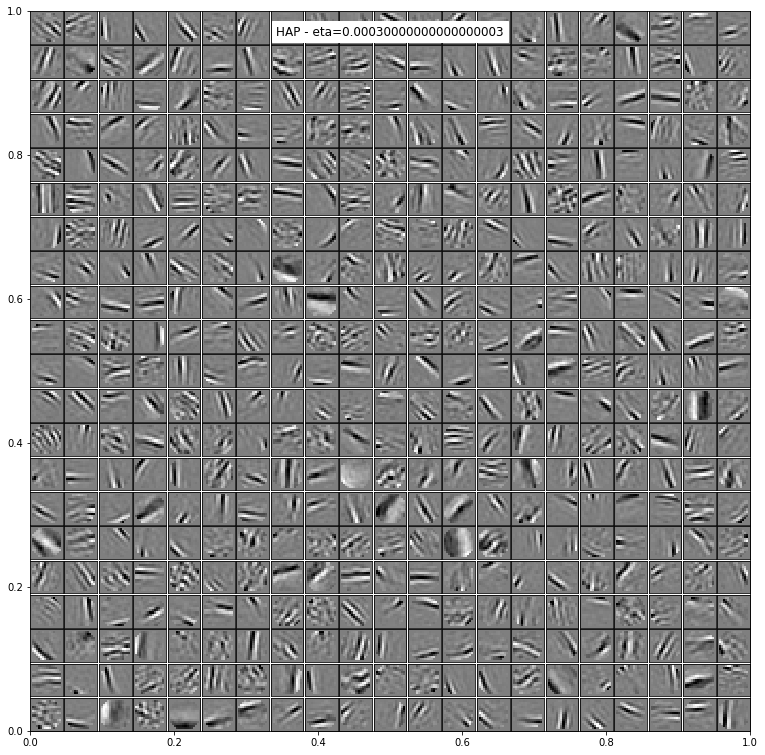

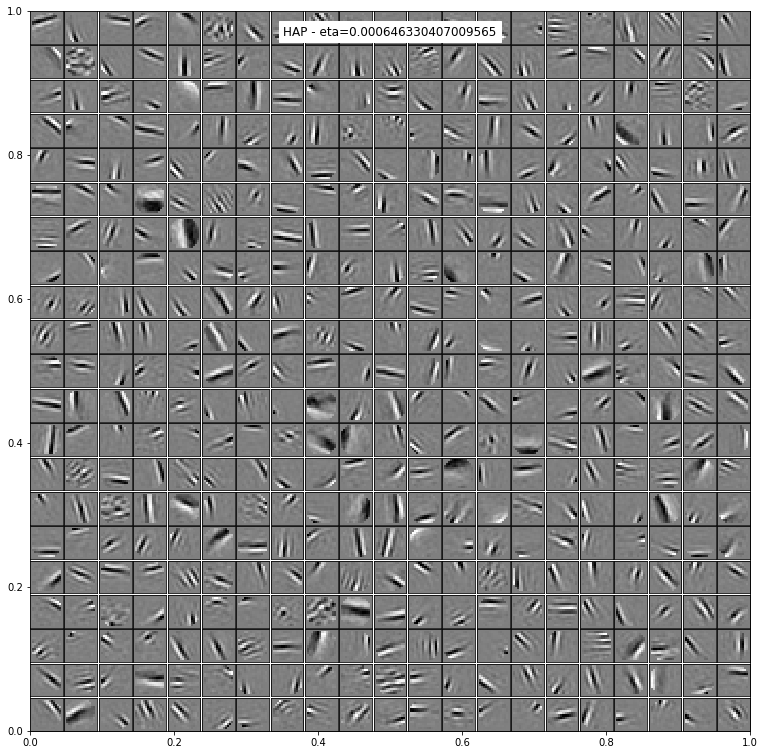

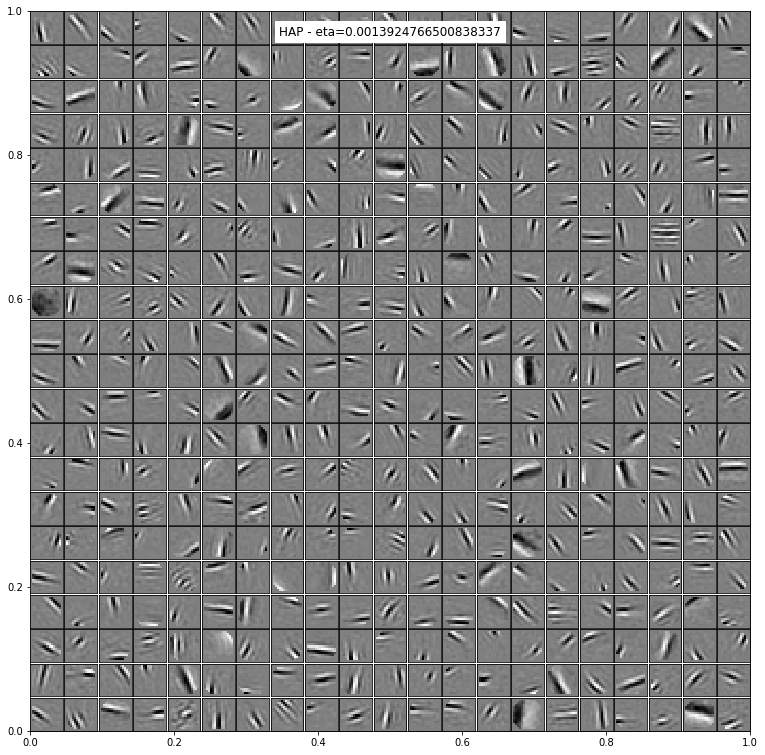

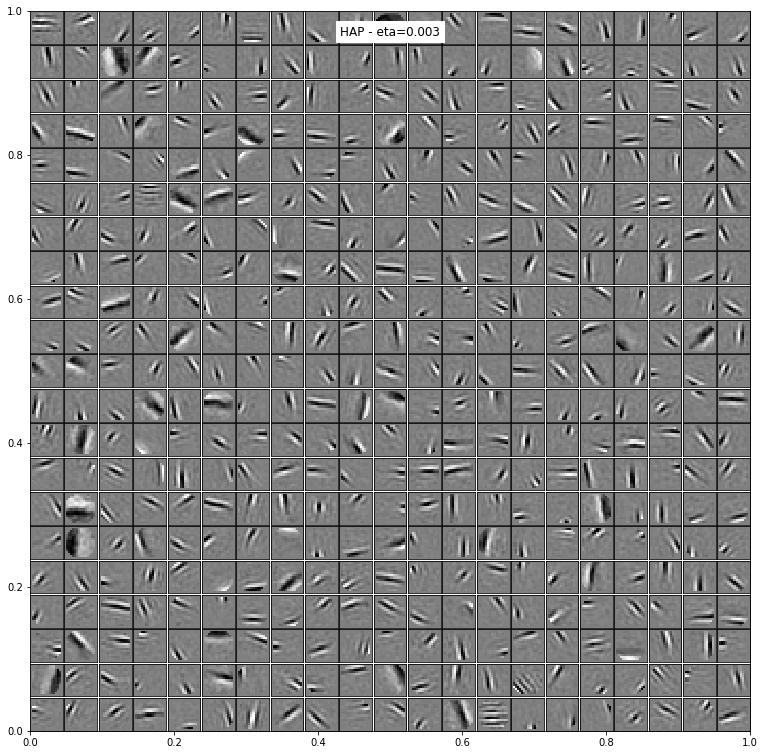

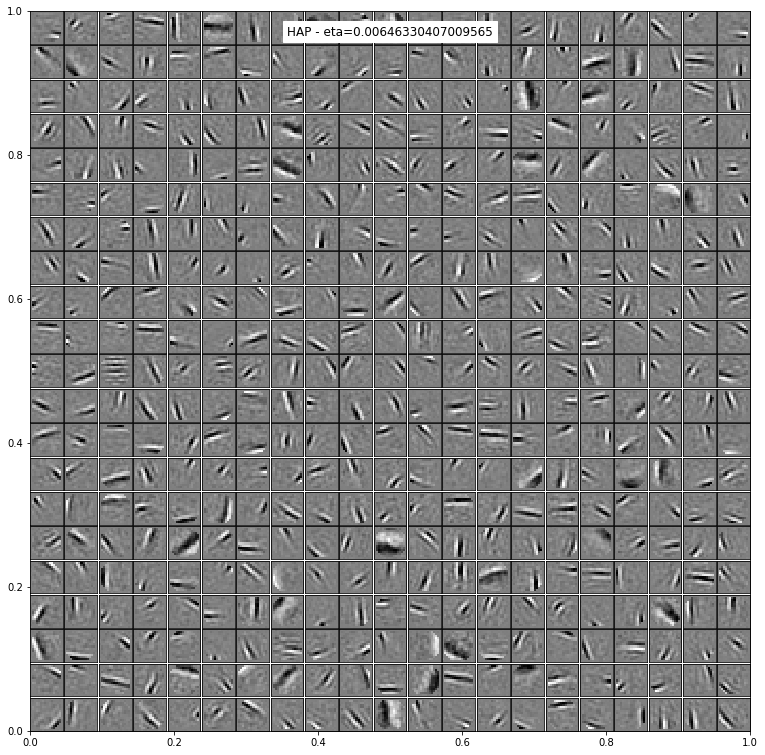

In [ ]:
%run {experiments.shl.data_cache}/{tag}.py

## Homeostasis à-la-SparseNet on the activation probability

In [ ]:
fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')

In [ ]:
experiments.scan(variable='eta_homeo', list_figures=[], display='')
fig, ax = experiments.scan(variable='eta_homeo', list_figures=[], display='dynamic')
fig, ax = experiments.scan(variable='eta_homeo', list_figures=[], display='final')

In [ ]:
fig, ax = experiments.scan(variable='alpha_homeo', list_figures=[], display='dynamic')
fig, ax = experiments.scan(variable='alpha_homeo', list_figures=[], display='final')

## different sparseness


In [ ]:
fig, ax = experiments.scan(variable='l0_sparseness', base=4, list_figures=[], display='dynamic')
fig, ax = experiments.scan(variable='l0_sparseness', base=4, list_figures=[], display='final')

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas